In [5]:
from __future__ import print_function, division

import pandas as pd

import numpy as np

pd.set_option('display.max_columns', 300)
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sb
sb.set_style('white') 

import nsfg
import first

In [6]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


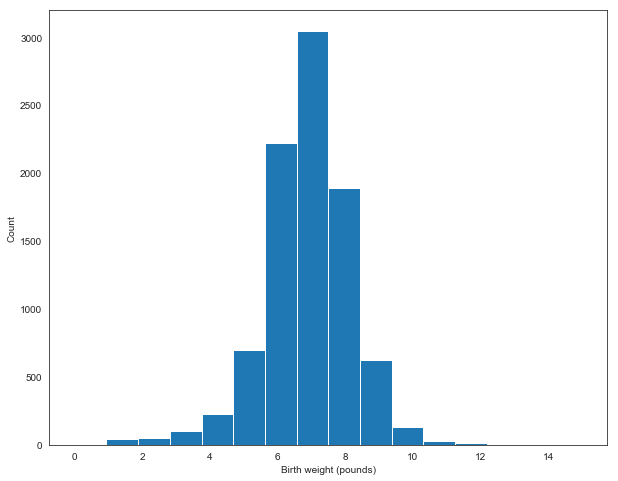

In [13]:
plt.hist(live['birthwgt_lb'], bins=16, label='birthwgt_lb')
plt.xlabel('Birth weight (pounds)')
plt.ylabel('Count');

To arrive at probabilities, we divide frequency by total sample size. 

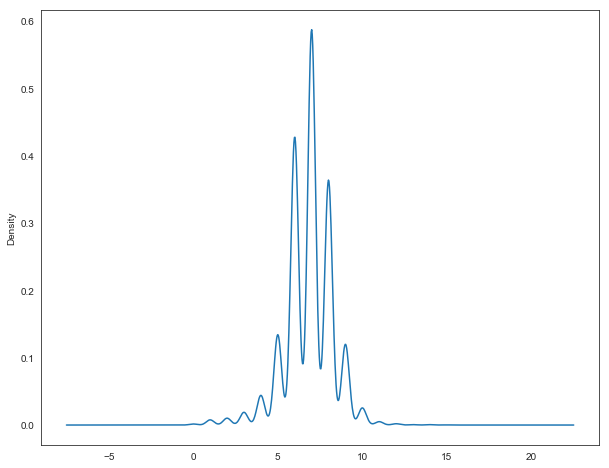

In [15]:
live['birthwgt_lb'].plot(kind='density');

### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [20]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [21]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

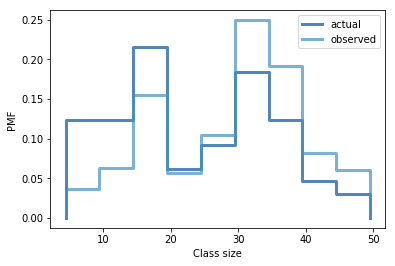

In [22]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [23]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [24]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [25]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

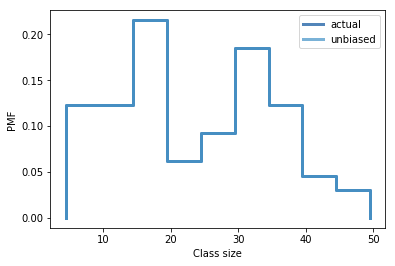

In [26]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.